# Project Overview
The National Basketball Association (NBA) is one of the most popular professional sports leagues in the world, with a large and dedicated fan base. Understanding the factors that contribute to a team's ability to score points is crucial for coaches, team managers, and owners, as it can inform decisions related to player acquisition, training and nutrition, and game strategy.

Knowing the points scored by a particular player beforehand can also help the stakeholders to make informed decisions on the playing time and role of the player in the team. For example, if a team has a player who is consistently scoring a high number of points, it might make sense to give them more playing time or to make them a focal point of the team's offensive strategy.

Additionally, predicting the points scored by a team can also help the stakeholders to make better decisions on game day. For example, if a team is expected to score a high number of points in a game, it might make sense to adopt a more aggressive offensive strategy or to focus on defending against the opposing team's best scorers. On the other hand, if a team is not expected to score many points, it might make sense to adopt a more defensive strategy or to focus on controlling the pace of the game.

In short, being able to accurately predict the points scored by a team can be a powerful tool for coaches, team managers, and owners as it can inform decisions related to player acquisition, training and nutrition, and game strategy, as well as help them to make better decisions on game day. Ultimately, this can lead to a more successful team, which can result in increased revenue and fan engagement.

In this project, we use a dataset of various attributes such as team name, points scored, average number of weightlifting sessions, average number of yoga sessions, average number of laps run per practice, water intake, and number of players absent for sessions from the NBA to predict the points scored by a sports team using polynomial regression. 

## Approach

* Data Preprocessing
  * Outlier removal
  * Imputing null values
  * Onehot encoding
* Model Building
  * Linear regression model building
  * Polynomial regression model building
* Model Evaluation
  * Evaluation of model on test data
  * Discussion on various regression matrix-like R-squared, AIC,
F-statistics

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [8]:
data = pd.read_csv("NBA_Dataset_csv.csv")

In [11]:
data.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [15]:
# shape of the data
print("Dimension of the dataset is=",data.shape)

Dimension of the dataset is= (159, 7)


In [16]:
# columns of data
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

## Exploratory Data Analysis

In [17]:
# Details about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [19]:
# renaming data columns
df = data.rename(columns={'Points_Scored':'Points', 
                          'Weightlifting_Sessions_Average':'WL',
                          'Yoga_Sessions_Average':'Yoga',
                          'Laps_Run_Per_Practice_Average':'Laps',
                          'Water_Intake':'WI',
                          'Players_Absent_For_Sessions':'PAFS'})

In [20]:
df.head()

,Team,Points,WL,Yoga,Laps,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [21]:
df.tail()

,Team,Points,WL,Yoga,Laps,WI,PAFS
154,Bulls,12,12.0,12.0,13.0,1.0,NaN
155,Bulls,13,12.0,12.0,14.0,1.0,NaN
156,Bulls,12,12.0,13.0,14.0,1.0,NaN
157,Bulls,20,13.0,14.0,15.0,1.0,6.0
158,Bulls,0,14.0,15.0,16.0,1.0,5.0


C:\Users\bwilc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot for Points')

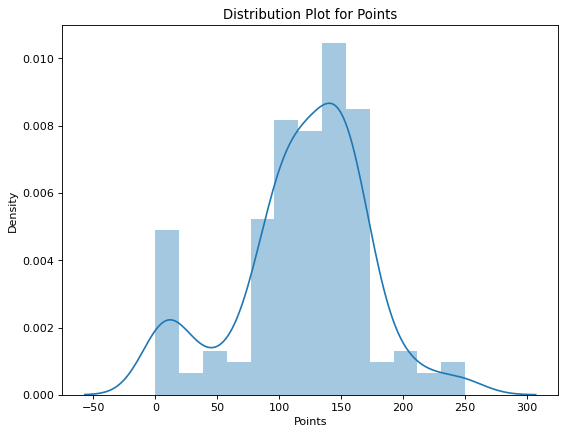

In [22]:
figure(figsize=(8,6), dpi=80)
ax=sns.distplot(df.Points)
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Points")

C:\Users\bwilc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot for Square Root of Points')

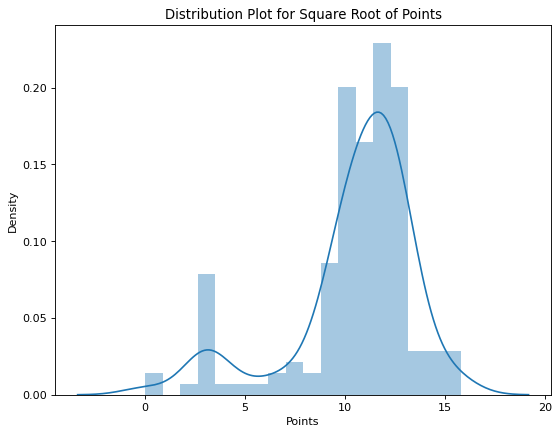

In [27]:
figure(figsize=(8, 6), dpi=80)
ax=sns.distplot(np.sqrt(df.Points))
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Square Root of Points")

C:\Users\bwilc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot for Points')

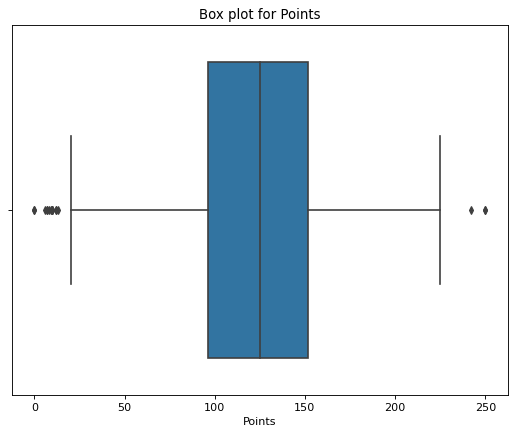

In [28]:
figure(figsize=(8,6), dpi=80)
sns.boxplot(df.Points)
plt.title("Box plot for Points")

In [37]:
# function to plot violin plots
def plotting_box_violin_plots(df, x, y):
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    fig.suptitle("Violin and box plots for variable : {}".format(y))
    
    sns.violinplot(ax=axes[0], x=x, y=y, data=df)
    sns.boxplot(ax=axes[1], data=df[y])
    
    axes[0].set_title("Violin plot for variable : {}".format(y))
    axes[1].set_title("Box plot for variable: {}".format(y))

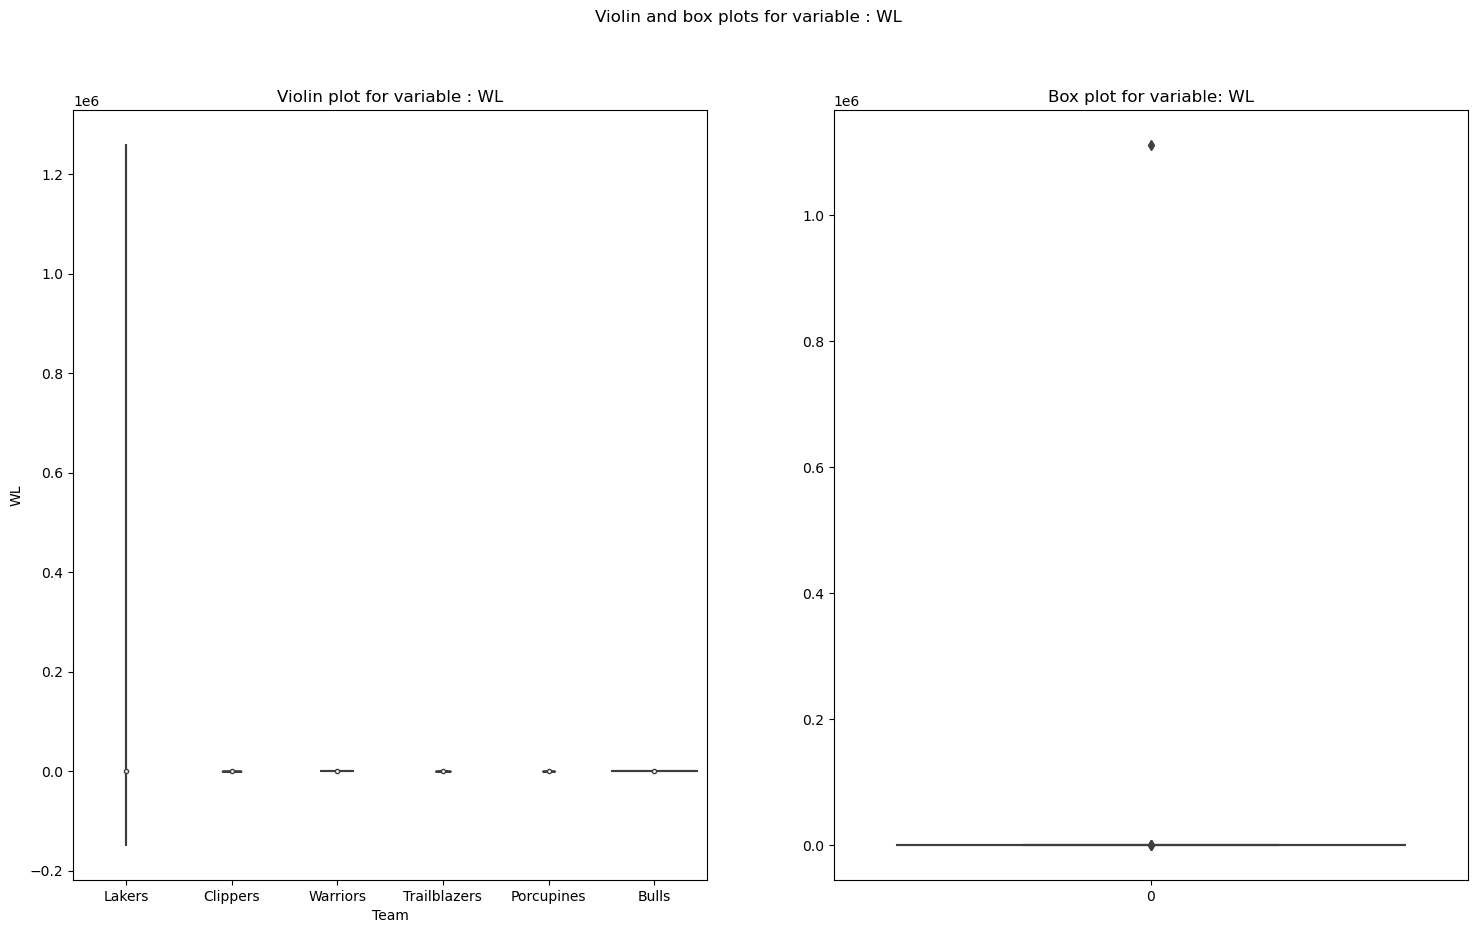

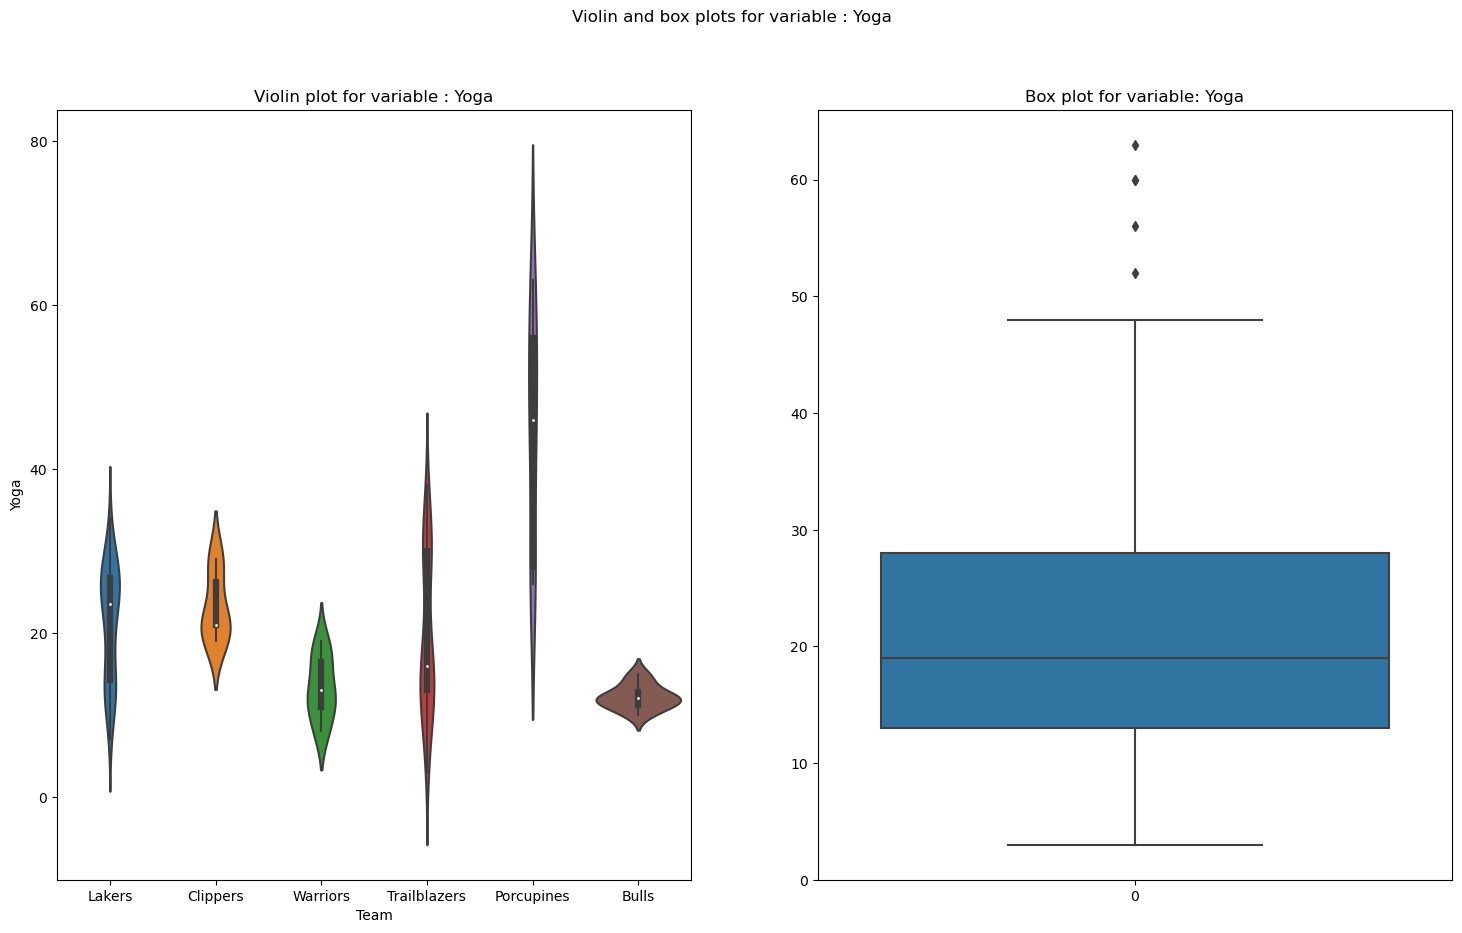

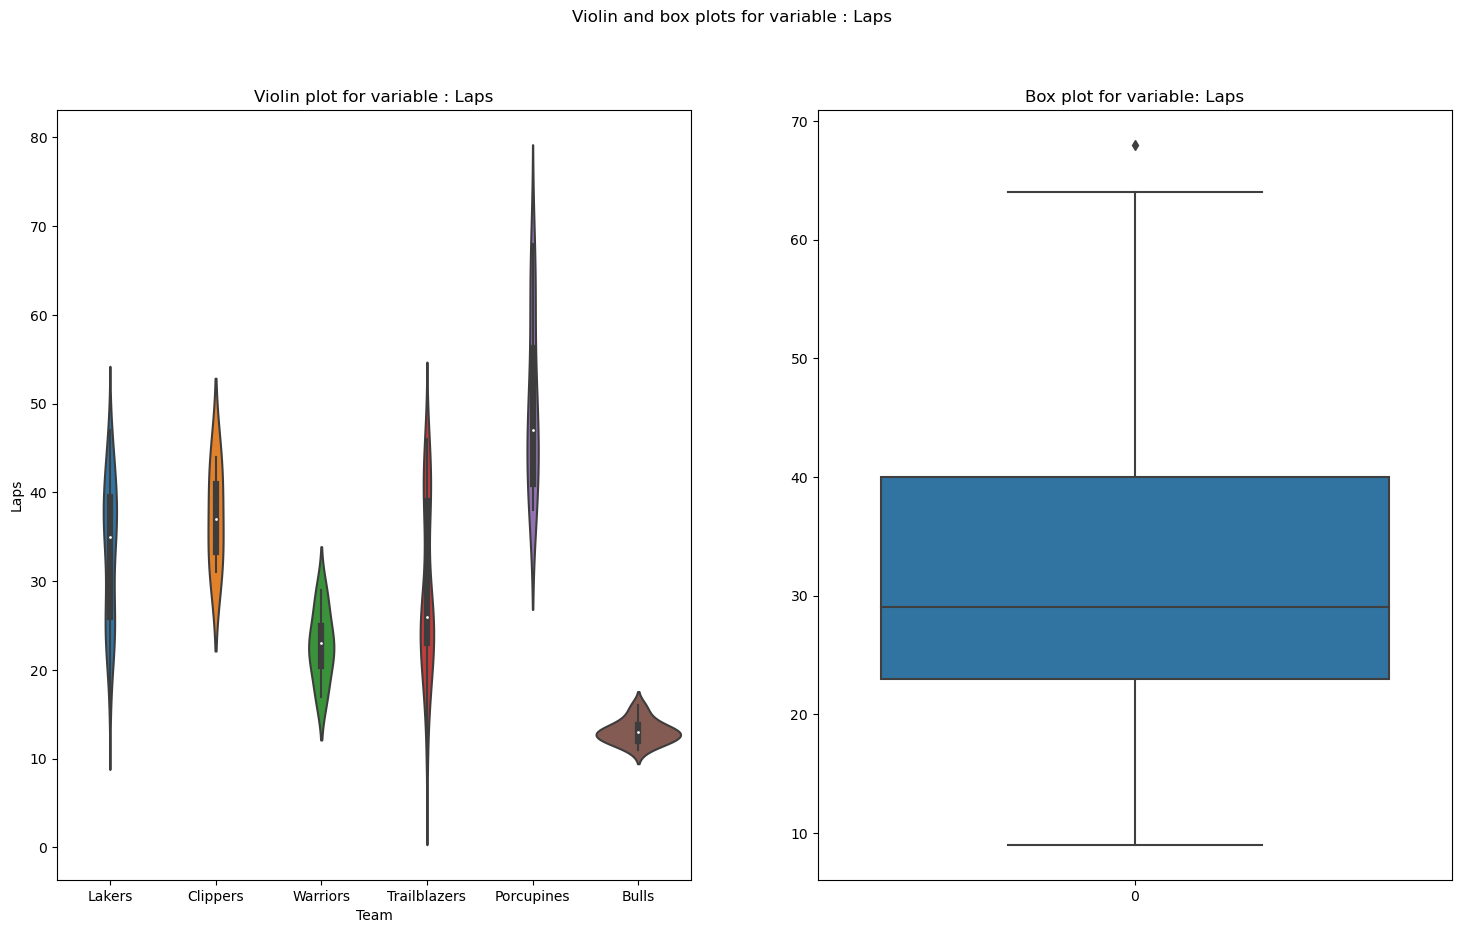

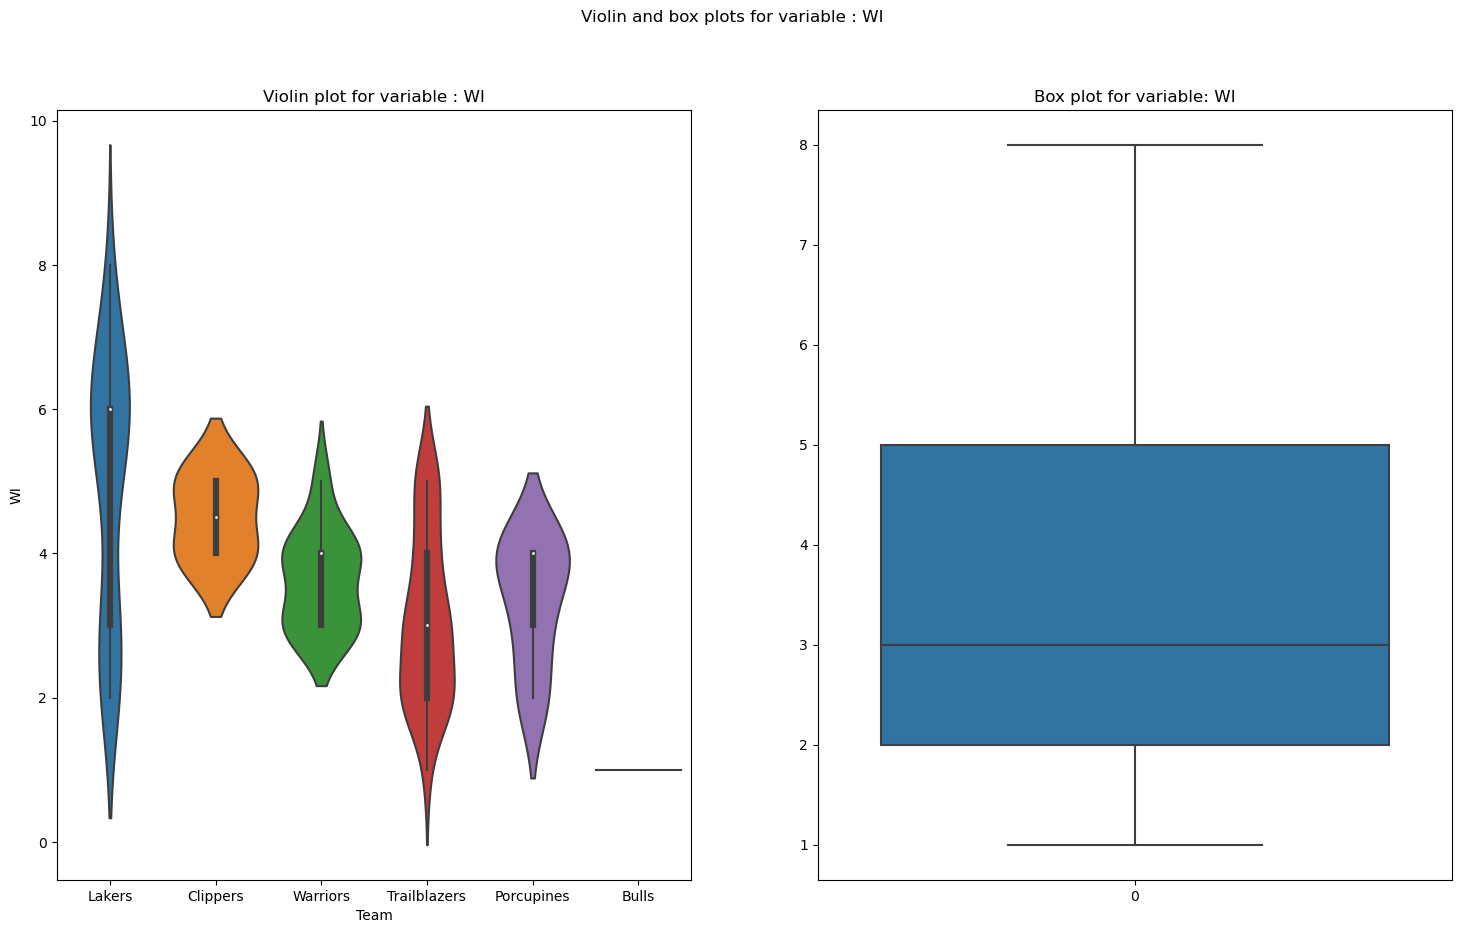

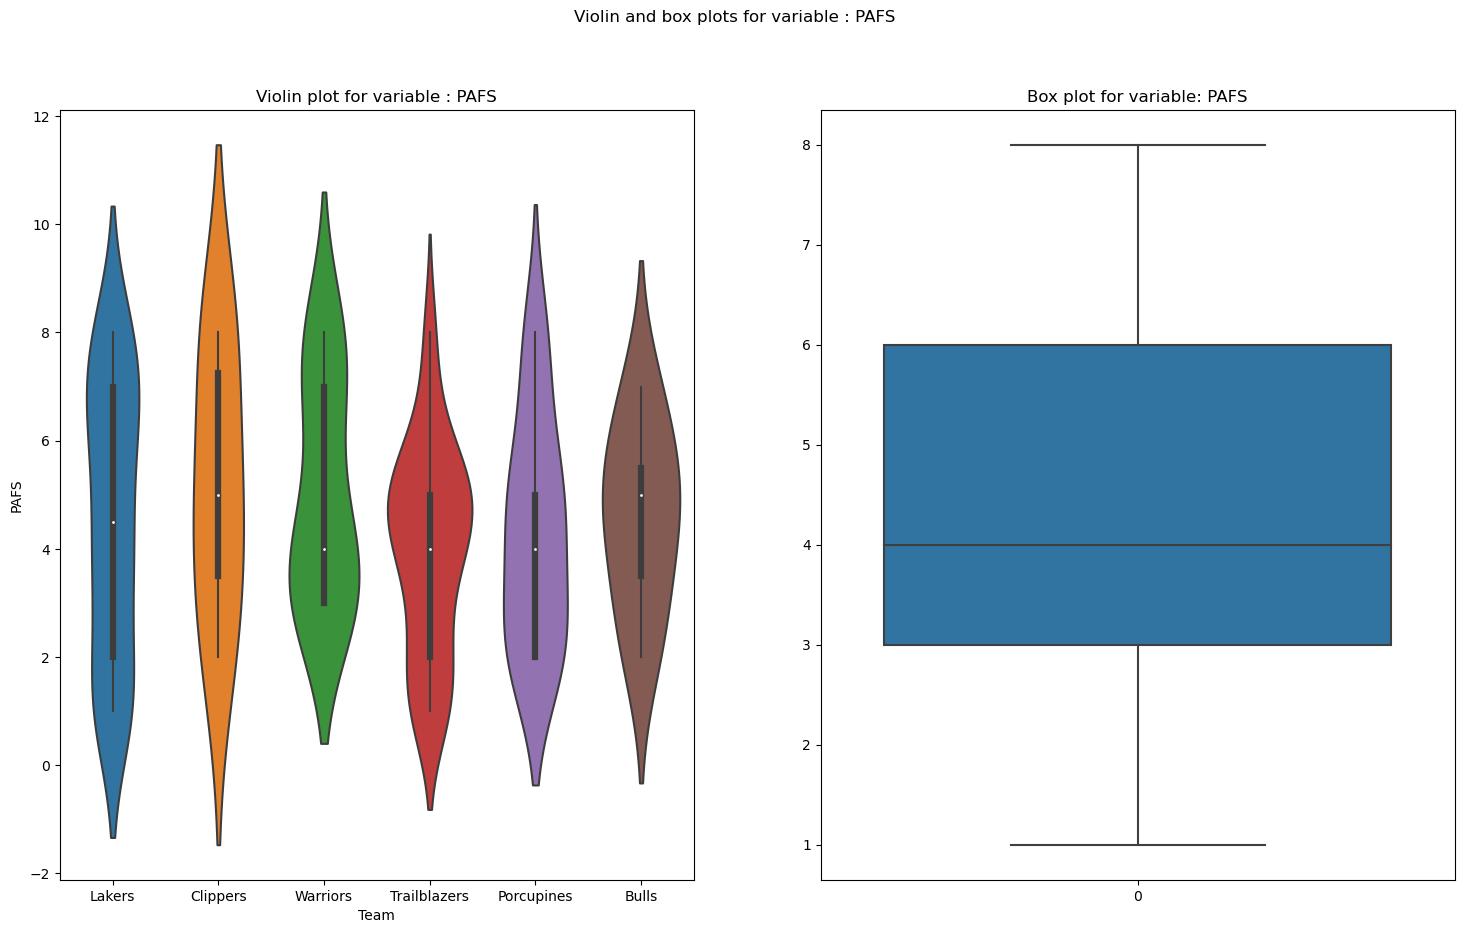

In [38]:
for x in ['WL', 'Yoga', 'Laps', 'WI', 'PAFS']:
    plotting_box_violin_plots(df,"Team", x)

In [32]:
df.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

## Finding Outliers using Inter Quartile Range

In [42]:
#function to find out outliers
def find_outliers(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Upper_End=Q3+1.5*IQR
    Lower_End=Q1-1.5*IQR
    
    outlier=df[col][(df[col]>Upper_End) | (df[col]<Lower_End)]
    return outlier


In [43]:
for col in ['WL','Yoga','Laps','WI','PAFS']:
    print('\n Outliers in column "%s"' %col)
    
    outlier = find_outliers(df, col)
    print(outlier)


 Outliers in column "WL"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in column "Yoga"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outliers in column "Laps"
144    68.0
Name: Laps, dtype: float64

 Outliers in column "WI"
Series([], Name: WI, dtype: float64)

 Outliers in column "PAFS"
Series([], Name: PAFS, dtype: float64)
